# Iris Model Classification

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
iris_data = pd.read_csv("iris.csv")

In [3]:
iris_data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
iris_data.shape

(150, 5)

In [8]:
iris_data["sepal_length"].value_counts()

5.0    10
5.1     9
6.3     9
5.7     8
6.7     8
5.8     7
5.5     7
6.4     7
4.9     6
5.4     6
6.1     6
6.0     6
5.6     6
4.8     5
6.5     5
6.2     4
7.7     4
6.9     4
4.6     4
5.2     4
5.9     3
4.4     3
7.2     3
6.8     3
6.6     2
4.7     2
7.6     1
7.4     1
7.3     1
7.0     1
7.1     1
5.3     1
4.3     1
4.5     1
7.9     1
Name: sepal_length, dtype: int64

In [9]:
iris_data["species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [10]:
iris_data["species"].value_counts().keys()

Index(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype='object')

# Checking if the values are null or not 

In [11]:
iris_data["petal_length"].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Name: petal_length, Length: 150, dtype: bool

In [12]:
sum(iris_data["petal_length"].isnull())

0

In [13]:
iris_data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# Building Graph

<AxesSubplot:>

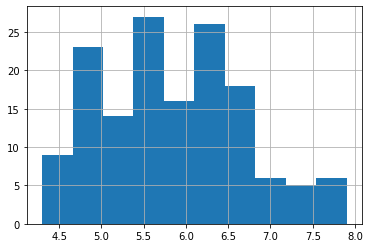

In [14]:
iris_data["sepal_length"].hist()

<AxesSubplot:>

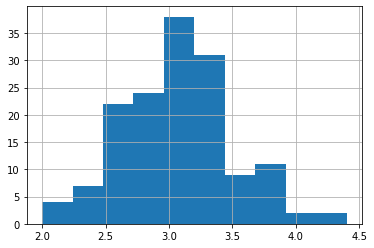

In [15]:
iris_data["sepal_width"].hist()

<AxesSubplot:>

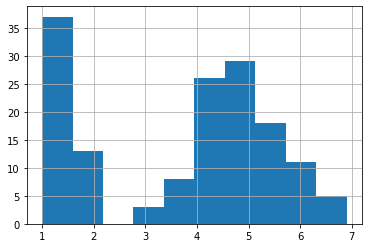

In [16]:
iris_data["petal_length"].hist()

<AxesSubplot:>

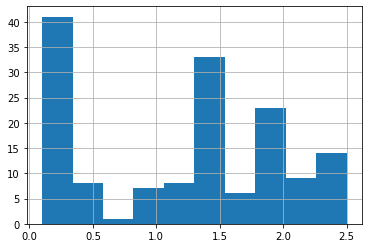

In [17]:
iris_data["petal_width"].hist()

# Scatter plot

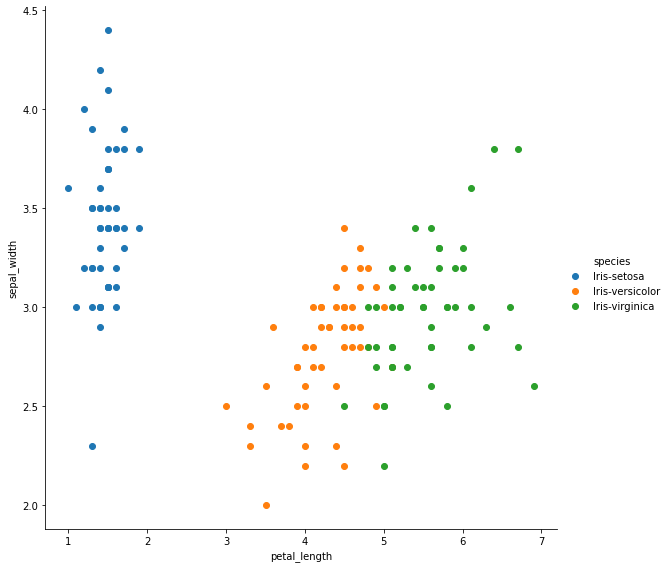

In [18]:
scatgraph = sns.FacetGrid(iris_data, hue="species", height = 8)
scatgraph.map(plt.scatter, "petal_length","sepal_width" )
scatgraph.add_legend()

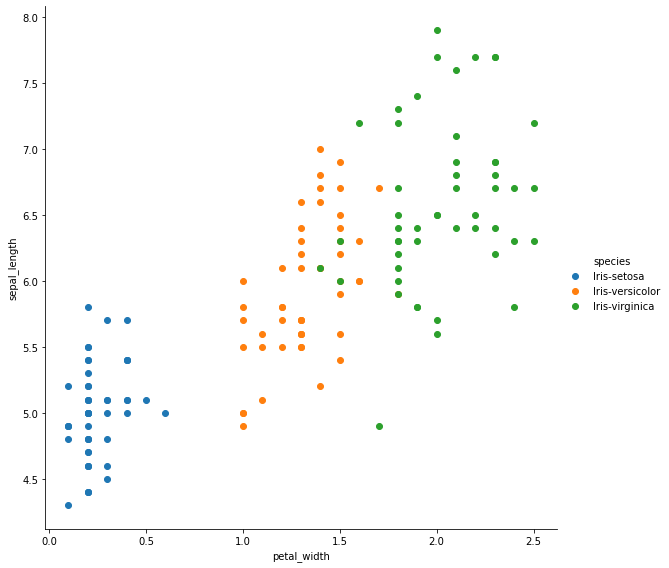

In [19]:
scatgraph = sns.FacetGrid(iris_data, hue="species", height = 8)
scatgraph.map(plt.scatter, "petal_width","sepal_length" )
scatgraph.add_legend()

# Conversion of variables into numbers as ML does not understand these Variables

In [20]:
mapping = {"Iris-setosa": 0, "Iris-versicolor":2, "Iris-virginica":3}
iris_data["species"] = iris_data["species"].map(mapping)

In [21]:
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Creating Model

In [22]:
x_train = iris_data[["sepal_length",'sepal_width', 'petal_length', 'petal_width']].values
y_train = iris_data[["species"]].values

In [23]:
model = LogisticRegression()

In [24]:
model.fit(x_train, y_train)

LogisticRegression()

# Accuracy

In [25]:
model.score(x_train, y_train)

0.9733333333333334

In [26]:
expected = y_train
predicted = model.predict(x_train)
predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int64)

# Summarization for better prediction

In [27]:
from sklearn import metrics

In [28]:
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           2       0.98      0.94      0.96        50
           3       0.94      0.98      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



In [29]:
print(metrics.confusion_matrix(expected, predicted))

[[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]


# Completed